In [1]:
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

HLT = ['全文', '活动', '发布', '记者', '奥运', '早安', '近日', '发展', '获得', '工作', '进行', '头条', '市民', '奥运会', '小编', '经济', '举行', '本报', '选手', '天气', '正式', '汽车', '企业', '报名', '成为', '决赛', '日前', '嘻嘻', '科技', '平台', '建设', '私信', '显示', '晚安', '小伙伴', '体验', '故事', '生活', '世界', '我市', '公司', '市场', '学习', '历史', '计划', '身体', '问题', '部分', '偷笑', '艺术', '如何', '城市', '机会', '开展', '国际', '创新', '不少', '相关', '继续', '习近平', '电影', '支持', '加油', '获悉', '时代', '博文', '举办', '文化', '昨日', '价格', '江门', '发布会', '最好', '比赛', '周刊', '推荐', '产业', '以来', '全球', '社区', '母亲', '英国', '日报', '回复', '喜欢', '时间', '快乐', '王宝强', '视频', '坚持', '作品', '司机', '同时', '海南', '一年', '民警', '值得', '一场', '妻子', '中国女排', '甚至', '最高', '品牌', '详见', '周末', '目前', '期待', '摄影', '中心', '上海', '亿元', '首次', '不同', '互联网', '宁德', '投票', '投资', '邀请', '产品', '价值', '给力', '梦想', '年度', '未来', '精彩', '对于', '有限公司', '今年', '高温', '进一步', '一天', '链接', '服务', '即将', '门票', '发现', '环境', '上午', '公布', '周报', '每日', '提醒', '情况', '忘记', '健康', '金牌', '运河', '大会', '经历', '道路']
LHF = ['转发', '爆炸', '天津', '塘沽', '一下', '日本', '朋友', '帮忙', '孩子', '大家', '刘翔', '中国', '真的', '成都', '如果', '扩散', '小孩', '不是', '真相', '票房', '一个', '人民', '打死', '狗肉', '贞子', '领养', '吃惊', '爱心', '看到', '你们', '高考', '马航', '知道', '钓鱼岛', '图片', '这是', '医院', '红十字会', '举报', '不要', '小女孩', '爸爸', '现在', '可怜', '起来', '香港', '安全带', '蜡烛', '收费', '消息', '发生', '严重', '政府', '已经', '死亡', '微信', '生命', '雅安', '速回', '轮奸', '照片', '接力', '瀑布', '酒吧', '知情者', '上映', '一面', '广州', '南京大屠杀', '希望', '强奸', '大陆', '所有', '真实', '女孩', '结婚', '失联', '爆料', '警察', '恐怖', '想见', '天一', '里面', '城管', '牙膏', '人数', '最后', '金陵', '衣服', '截图', '耽误', '姜文', '拐走', '保罗', '多菌灵', '号码', '国难日', '大黄', '爱国', '事件', '认识', '两个', '一位', '交警', '大人', '注意', '强拆', '军车', '就是', '妈妈', '纪念日', '大润发', '绝对', '信息', '不系', '牺牲', '百度', '十三', '微博', '怎么', '沃克', '重庆', '什么', '那些', '名字', '离开', '厦门', '家乐福', '围观', '敢不敢', '当场', '附近', '联系', '和谐', '谢谢', '结果', '男人', '这条', '女人', '旅行团', '进去', '酒驾', '享年', '可口可乐', '尼玛', '学生', '双休日', '左右', '去世', '狗狗']

In [2]:
import os
import pandas as pd
from collections import Counter

path = 'data/emo_dict_final_dropdup'
files = os.listdir(path)
sent_dict = []
for file in files:
    position = path + '/' +file
    with open(position, 'r', encoding='utf-8-sig') as f:
        for word in f:
            word = word.strip()
            tup = (word, file[:-4])
            sent_dict.append(tup)
            
sent_dict = pd.DataFrame(sent_dict)
sent_dict.columns = ['word', 'emo_label']

emotions = ['anger', 'disgust', 'joy', 'sadness', 'fear']

def key_word_emo(words):
    score = [0, 0, 0, 0, 0]
    emo_words = []
    for word in words:
        for e in range(5):
            if word in sent_dict['word'][sent_dict['emo_label']==emotions[e]].values:
                print(word+':'+emotions[e])
                emo_words.append(word)
                score[e] += 1
            else:
                pass
    s = sum(score)
    if s != 0:
        score = [score[i]/s for i in range(5)]
    print(score)
    return emo_words

In [3]:
emo_words_T = key_word_emo(HLT)
emo_words_F = key_word_emo(LHF)

早安:joy
嘻嘻:joy
晚安:joy
偷笑:joy
支持:joy
加油:joy
最好:joy
喜欢:joy
快乐:joy
坚持:joy
值得:joy
最高:joy
期待:joy
给力:joy
梦想:joy
精彩:joy
健康:joy
金牌:joy
[0.0, 0.0, 1.0, 0.0, 0.0]
爆炸:fear
帮忙:joy
打死:anger
吃惊:fear
爱心:joy
举报:anger
可怜:sadness
死亡:sadness
轮奸:anger
南京大屠杀:anger
希望:joy
强奸:anger
失联:sadness
爆料:disgust
恐怖:fear
耽误:sadness
强拆:anger
军车:fear
和谐:joy
谢谢:joy
尼玛:anger
[0.3333333333333333, 0.047619047619047616, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047]


In [4]:
for word in emo_words_T:
    HLT.remove(word)
for word in emo_words_F:
    LHF.remove(word)

In [5]:
HLT = emo_words_T + HLT
LHF = ['打死', '举报', '轮奸', '南京大屠杀', '强奸', '强拆', '尼玛', '帮忙', '爱心', '希望', '和谐', '谢谢', 
      '可怜', '死亡', '失联', '耽误', '爆炸', '吃惊', '恐怖', '军车', '爆料', ] + LHF

In [6]:
len(LHF)

150

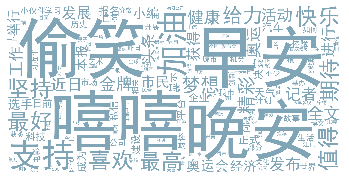

In [9]:
import wordcloud
from PIL import Image

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
#         h  = 2
#         s = 98.5
#         l = 74.3
        h  = 199
        s = 28.0
        l = 60.8
        return "hsl({}, {}%, {}%)".format(h, s, l)
# weibo_mask = np.array(Image.open('images/weibo.jpg'))
WC = wordcloud.WordCloud(font_path="C:/Windows/Fonts/simhei.ttf", background_color='white',
                          scale=4, margin=1, max_font_size=80, 
                         color_func = random_color_func,
                         random_state=2020).generate(' '.join(HLT))
# plt.figure(figsize=[8, 4])
plt.imshow(WC)
plt.axis('off')
WC.to_file('images/wordcloud_HLT.jpg')
WC.to_file('images/wordcloud_HLT.pdf')
plt.show()

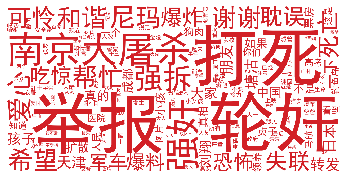

In [14]:
import wordcloud
from PIL import Image

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h  = 358
        s = 73.6
        l = 47.5
        return "hsl({}, {}%, {}%)".format(h, s, l)
# weibo_mask = np.array(Image.open('images/weibo.jpg'))
WC = wordcloud.WordCloud(font_path="C:/Windows/Fonts/simhei.ttf", background_color='white',
                          scale=4, margin=1, max_font_size=80, 
                         color_func = random_color_func,
                         random_state=2020).generate(' '.join(LHF))
# plt.figure(figsize=[8, 4])
plt.imshow(WC)
plt.axis('off')
WC.to_file('images/wordcloud_LHF.jpg')
WC.to_file('images/wordcloud_LHF.pdf')
plt.show()

In [10]:
key_words_LHF_2 = []
with open('data/key_words_LHF_2.txt', 'r', encoding='utf-8-sig') as f:
        for word in f:
            word = word.strip()
            key_words_LHF_2.append(word)
key_words_LHF_2 = key_words_LHF_2[:150]
emo_words_LHF_2 = key_word_emo(key_words_LHF_2)

爆炸:fear
可怜:sadness
好人:joy
罚款:anger
壮观:joy
爱心:joy
心痛:sadness
打死:anger
尼玛:anger
尸体:fear
南京大屠杀:anger
惨烈:anger
谢谢:joy
我草:anger
耽误:sadness
恶心:disgust
间谍:fear
失联:sadness
[0.3333333333333333, 0.05555555555555555, 0.2222222222222222, 0.2222222222222222, 0.16666666666666666]


In [11]:
key_words_HLF = []
with open('data/key_words_HLF.txt', 'r', encoding='utf-8-sig') as f:
        for word in f:
            word = word.strip()
            key_words_HLF.append(word)
key_words_HLF = key_words_HLF[:150]
emo_words_HLF = key_word_emo(key_words_HLF)

帮助:joy
跳楼:fear
违反:anger
留意:joy
鼓掌:joy
可怕:fear
看好:joy
地沟油:disgust
珍惜:joy
抓狂:anger
酬金:joy
帮忙:joy
地震:fear
嘻嘻:joy
心脏病:fear
感谢:joy
[0.125, 0.0625, 0.5625, 0.0, 0.25]


In [12]:
for word in emo_words_LHF_2:
    key_words_LHF_2.remove(word)
for word in emo_words_HLF:
    key_words_HLF.remove(word)

In [13]:
key_words_LHF_2 = emo_words_LHF_2 + key_words_LHF_2
key_words_HLF = emo_words_HLF + key_words_HLF

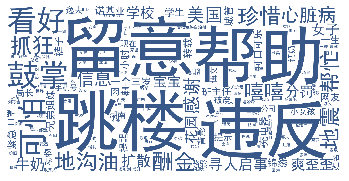

In [16]:
import wordcloud
from PIL import Image

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h  = 216
        s = 42.0
        l = 37.8
        return "hsl({}, {}%, {}%)".format(h, s, l)
# weibo_mask = np.array(Image.open('images/weibo.jpg'))
WC = wordcloud.WordCloud(font_path="C:/Windows/Fonts/simhei.ttf", background_color='white',
                          scale=4, margin=1, max_font_size=80, 
                         color_func = random_color_func,
                         random_state=2020).generate(' '.join(key_words_HLF))
# plt.figure(figsize=[8, 4])
plt.imshow(WC)
plt.axis('off')
WC.to_file('images/wordcloud_HLF.jpg')
WC.to_file('images/wordcloud_HLF.pdf')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


emo1 = [0.0, 0.0, 1.0, 0.0, 0.0]
emo2 = [0.190,0.190,0.238,0.0476,0.333]
emo3 = [0.25, 0.0, 0.5625, 0.0625, 0.125]
font1 = {
    'weight' : 'normal',
    'size'   : 18,
}
font2 = {
    'weight' : 'normal',
    'size'   : 14,
}
width = 0.35
x = np.arange(5)
labels = ['Fear', 'Sadness','Joy','Disgust',  'Anger']

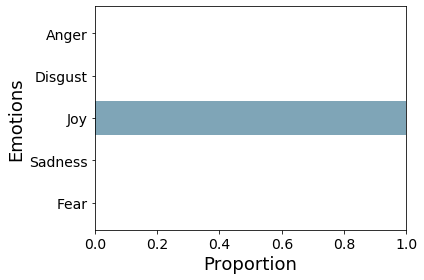

In [3]:
fig, ax = plt.subplots()
ax.barh(x, emo1, color="#7FA5B7", label="HLT news")
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Emotions', font1, color='black')
ax.set_xlabel('Proportion', font1, color='black')
ax.tick_params(labelsize=14, colors='black')
# ax.legend(prop = font1)
ax.set_xlim(0,1)
plt.tight_layout()
plt.savefig('images/emo_ratio_HLT.pdf')
plt.savefig('images/emo_ratio_HLT.jpg', dpi=600)
plt.show()

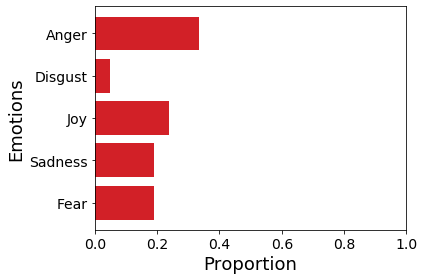

In [4]:
fig, ax = plt.subplots()
ax.barh(x, emo2, color="#D22027", label="LHF news")
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Emotions', font1, color='black')
ax.set_xlabel('Proportion', font1, color='black')
ax.tick_params(labelsize=14, colors='black')
# ax.legend(prop = font1)
ax.set_xlim(0,1)
plt.tight_layout()
plt.savefig('images/emo_ratio_LHF.pdf')
plt.savefig('images/emo_ratio_LHF.jpg', dpi=600)
plt.show()

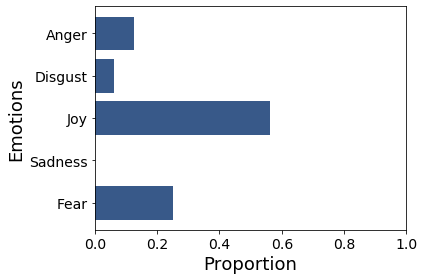

In [5]:
fig, ax = plt.subplots()
ax.barh(x, emo3, color="#385989", label="HLF news")
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_ylabel('Emotions', font1, color='black')
ax.set_xlabel('Proportion', font1, color='black')
ax.tick_params(labelsize=14, colors='black')
# ax.legend(prop = font1)
ax.set_xlim(0,1)
plt.tight_layout()
plt.savefig('images/emo_ratio_HLF.pdf')
plt.savefig('images/emo_ratio_HLF.jpg', dpi=600)
plt.show()